# Dataset Import

In [1]:
import pandas as pd
import numpy as np

In [2]:
import csv

In [3]:
data_frame = pd.read_csv("training.txt",delimiter="\t", header=None)

In [4]:
data_frame.columns = ['Sentiment', 'Message']

In [5]:
data_frame.head()

,Sentiment,Message
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


In [6]:
one = data_frame[data_frame.Sentiment == 1]
zeros = data_frame[data_frame.Sentiment == 0]

In [7]:
one.shape

(3943, 2)

In [8]:
zeros.shape

(2975, 2)

In [9]:
data_frame.describe()

,Sentiment
count,6918.000000
mean,0.569962
std,0.495117
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


# Model building

## Librairies Import

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
                        
cv = CountVectorizer(lowercase=True, stop_words='english', ngram_range = (1,1), tokenizer = token.tokenize)
                        
text_counts = cv.fit_transform(data_frame['Message'].values)

## For training the model and Cross-Validation

In [11]:
def trainAndScore(model, X, y) :
    list_test_size = [a/20.0 for a in list(range(0,20,1))][1:]
    scores = []
    for ts in list_test_size:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=0)
        clf = model.fit(X_train, y_train)
        scores.append(clf.score(X_test, y_test))
    print("scores : ",scores)
    print(np.array(scores).mean())

### Spliting the data into train and test datas

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_counts, data_frame['Sentiment'], test_size=0.3, random_state=1)

### Text Classification Model using Naive Bayes classifier 

In [13]:
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics

clf = MultinomialNB().fit(X_train, y_train)

predicted= clf.predict(X_test)
print("Naive Bayes classifier Accuracy:",metrics.accuracy_score(y_test, predicted)*100,"%")

Naive Bayes classifier Accuracy: 99.03660886319847 %


In [67]:
model = MultinomialNB()
trainAndScore(model, text_counts, data_frame['Sentiment'])

scores :  [0.9826589595375722, 0.9841040462427746, 0.98747591522158, 0.9869942196531792, 0.9872832369942196, 0.9884393063583815, 0.9876135425268373, 0.9859104046242775, 0.9849068721901092, 0.9855449551893611, 0.9844940867279894, 0.9853047458443749, 0.9837669557482767, 0.9841007639892628, 0.9841973405280401, 0.9821138211382113, 0.9790851895936066, 0.9760719447567047, 0.9774836452152746]
0.984081576425265


## Model Performance - Precision and Recall

In [15]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, predicted)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.99


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.99')

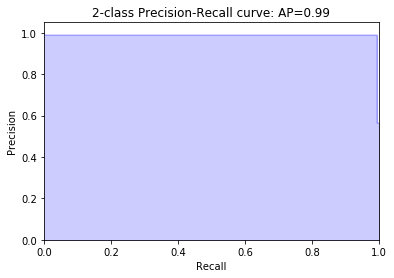

In [17]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature

precision, recall, _ = precision_recall_curve(y_test, predicted)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

### Text Classification Model using TF-IDF

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(data_frame['Message'])

In [89]:
X_train, X_test, y_train, y_test = train_test_split(text_tf, data_frame['Sentiment'], test_size=0.10, random_state=1)

In [90]:
clf = MultinomialNB().fit(X_train, y_train)

predicted= clf.predict(X_test)
print("Naive Bayes classifier Accuracy:",metrics.accuracy_score(y_test, predicted)*100,"%")

Naive Bayes classifier Accuracy: 97.83236994219652 %


In [71]:
trainAndScore(model, text_tf, data_frame['Sentiment'])

scores :  [0.9595375722543352, 0.9653179190751445, 0.9730250481695568, 0.976878612716763, 0.9803468208092485, 0.9821772639691715, 0.9797687861271677, 0.9797687861271677, 0.9788053949903661, 0.9783174327840416, 0.9763469119579501, 0.9780775716694773, 0.9775405826106293, 0.9756349370225067, 0.9751397186355752, 0.9725383920505871, 0.9709233123618433, 0.9694877147904287, 0.9621177544500228]
0.9743026596090518
